# Part 1: Dataset Preparation and Network Design

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import scipy

# data viz
import matplotlib.pyplot as plt

2024-01-27 19:45:23.790887: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load MNIST
data = keras.datasets.mnist.load_data(path="mnist.npz")
data

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_ideal, y_ideal) = data
type(X_train)

numpy.ndarray

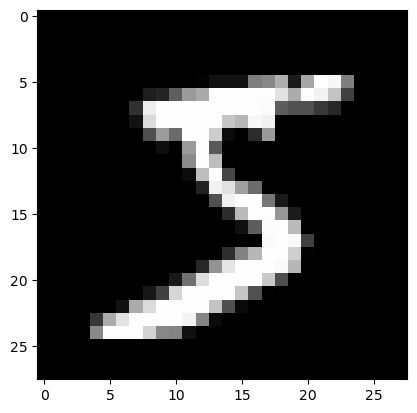

In [35]:
plt.imshow(X_train[0], cmap="gray")

In [6]:
print(X_train[0].shape)
y_train[0]

(28, 28)


5

In [7]:
print(len(y_train))
print(len(y_ideal))

60000
10000


In [8]:
# scale the images in the [0, 1] range
X_train = X_train.astype("float32") / 255.0
X_ideal = X_ideal.astype("float32") / 255.0

In [9]:
# Imports for straight up loading the model
from keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Reshape
from keras.models import Model, Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import SGD

In [9]:
from keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Reshape
from keras.models import Model, Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import SGD


# Wanted to challenge myself, wasn't sure if it was ok, so I left it like this in a comment :)
'''
# Instantiated like so: `ConvBlock(50)` and `ConvBlock(20)`
class ConvBlock(keras.layers.Layer):
  def __init__(self, units: int):
    super().__init__()
    self.conv = Conv2D(units, kernel_size=(5, 5), padding="valid")
    self.activation_func = Activation("relu")
    self.max_pool = MaxPooling2D(pool_size=(2, 2), strides=2)

  def call(self, inputs):
    x = self.conv(inputs)
    x = self.activation_func(x)
    x_ = self.max_pool(x)

    return x_ 
'''

# Model time! (LeNet)
model = Sequential([
    Input(shape=(28, 28)),
    Reshape(target_shape=(28, 28, 1)),
    
    # Conv Block 1
    Conv2D(50, kernel_size=(5, 5), padding="valid"),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    # Conv Block 2
    Conv2D(20, kernel_size=(5, 5), padding="valid"),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten
    Flatten(),

    Dense(200, activation="relu"),
    Dense(2, activation="linear"),  # "embedding" layer for visualization

    Dense(10, activation="softmax")  # not logits ;_;
])

model.compile(loss=SparseCategoricalCrossentropy(), optimizer=SGD(learning_rate=0.01))

model.fit(X_train, y_train, batch_size=100, epochs=200, validation_split=0.1)

Epoch 1/200
540/540 [==============================] - 18s 33ms/step - loss: 1.9620 - val_loss: 1.3983
Epoch 2/200
540/540 [==============================] - 18s 33ms/step - loss: 1.1646 - val_loss: 1.1083
Epoch 3/200
540/540 [==============================] - 16s 30ms/step - loss: 0.8738 - val_loss: 0.7078
Epoch 4/200
540/540 [==============================] - 18s 33ms/step - loss: 0.7047 - val_loss: 0.5820
Epoch 5/200
540/540 [==============================] - 17s 31ms/step - loss: 0.5985 - val_loss: 0.5216
Epoch 6/200
540/540 [==============================] - 18s 33ms/step - loss: 0.5229 - val_loss: 0.4355
Epoch 7/200
540/540 [==============================] - 18s 33ms/step - loss: 0.4693 - val_loss: 0.4134
Epoch 8/200
540/540 [==============================] - 17s 31ms/step - loss: 0.4299 - val_loss: 0.3578
Epoch 9/200
540/540 [==============================] - 18s 33ms/step - loss: 0.3917 - val_loss: 0.3413
Epoch 10/200
540/540 [==============================] - 18s 33ms/step - l

In [10]:
# Save the model
model = tf.keras.models.load_model("lenet.keras")
#model.save("lenet.h5")

# Part II: Exploring the Learned Representation

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 50)        1300      
                                                                 
 activation (Activation)     (None, 24, 24, 50)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          25020     
                                                                 
 activation_1 (Activation)   (None, 8, 8, 20)          0         
                                                        

In [41]:
model.layers

Show (as images) the filter matrices learned in the first layer of the network.  What do they look like?  Alternately, show as images the result of the first layer of filters on some input images.  What does the network seem to be looking for in the input images?  (To access the filter weights, use model.layers[0].weights[0]).  

**The network seems to be looking for tiny features like edges which would translate to parts of handwritten digits from the input images.**

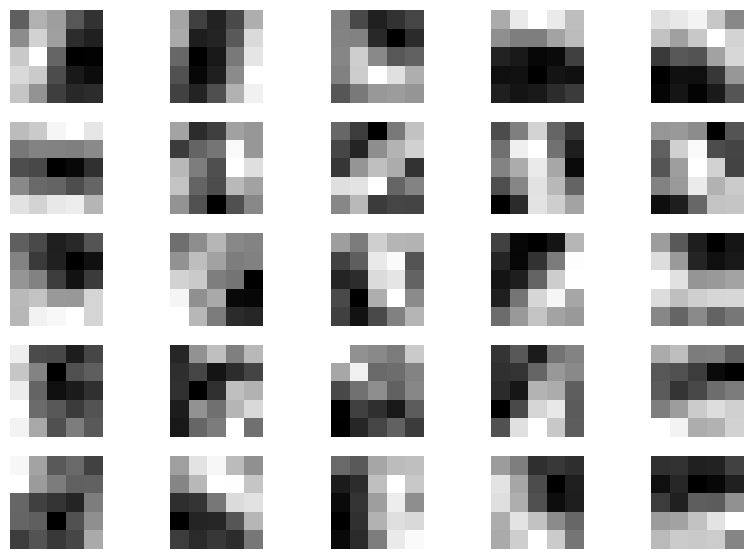

In [12]:
fig = plt.figure(figsize=(10, 7))
(rows, cols) = (5, 5)

for i in range(rows*cols):
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(np.reshape(model.layers[1].weights[0], (5, 5, 50))[:, :, i], cmap="gray")
  plt.axis('off')

Visualize the embedding learned by the network.  (In other words, make a scatter plot of the 2D embedding vectors produced by the network when given the training images as input.)  What shape does the embedding have?  Why?

**The embedding has the shape of a 9-pointed star. This is because the network has separated each example into classes to classify them in the final Dense layer, as part of the layer-based approach in order to find the transformation that maps the input to output as described by the training data. The 10th class (0) is likely the group that is in the middle. Essentially, each of these can be clustered into classes, which is what the network learns to do in order to separate and classify them.**

In [61]:
# To do this, we need to make a 'new' model
embedding_layer = model.layers[-2]

embedding_model = Model(inputs=model.input, outputs=embedding_layer.output)

In [64]:
# generate embeddings
embeddings = embedding_model.predict(X_train)

1875/1875 [==============================] - 9s 5ms/step


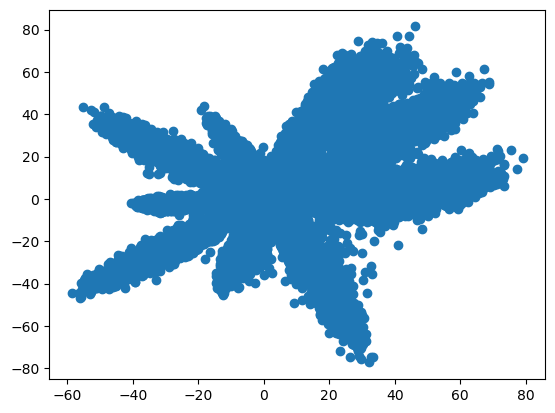

In [65]:
# Create scatter plot
plt.scatter(embeddings[:, 0], embeddings[:, 1])

Take an example of each digit and rotate it in 15 degree increments (`scipy.ndimage.rotate`).  Run the classifier on each rotated image and see what happens to their class probabilities.  We would assume that an upside down 6 will be classified as a 9.  But what happens in between?  What does an upside down 2 get classified as?

**An upside down 6, at least according to these training examples, *is* classified as a 9. However, as it is rotating upside-down, it is classified as a 7. This is because it seems to have features that are 'like' a 7 due to its posture. An upside down 2 gets classified as an 8. This means that the model is NOT invariant to rotation.**

[1, 3, 5, 7, 2, 0, 13, 15, 17, 4]


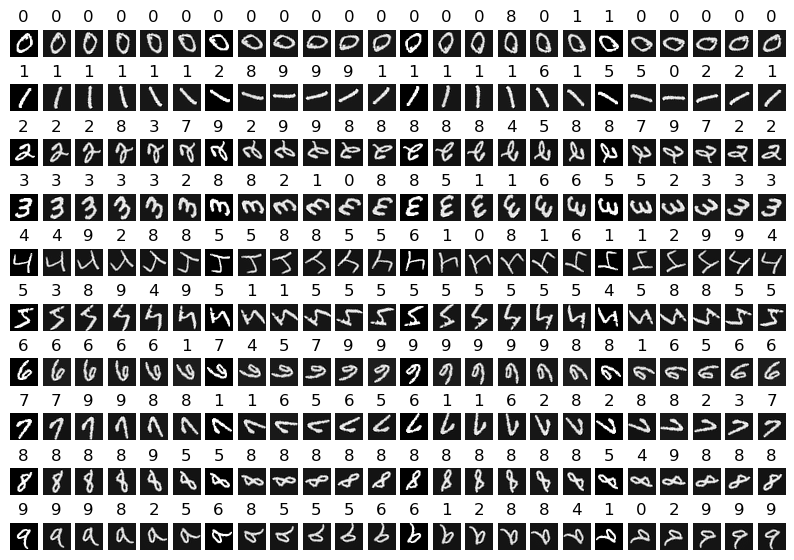

In [45]:
import scipy
from scipy import ndimage


# 15 * 24 = 360
# shape: (10, 24, 15, 28, 28)
# each index points to an index of the training set that is said index as the label
indices = [list(y_train).index(i) for i in range(10)]
print(indices)

preds = []
digit_preds = []

fig = plt.figure(figsize=(10, 7))
(rows, cols) = (10, 24)

# start @ -1 to cover base case
n = 0
for i in range(rows*cols):
  rot = i % 24
  
  digit_index = indices[n]
  image = X_train[digit_index]
  #print(f"n = {n} => {digit_index}: {y_train[digit_index]}")
  #print(image.shape)

  rotated_image = ndimage.rotate(image, rot * 15, reshape=False)
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(rotated_image, cmap="gray")
  plt.axis('off')
  
  #print(rotated_image.shape)
  prediction = model.predict(rotated_image.reshape(1, 28, 28), verbose=0)
  digit_preds.append(prediction)

  plt.title(np.argmax(prediction))

  # Every 24 rotations, n++
  if (i + 1) % 24 == 0:
    n = n + 1
    
    preds.append(digit_preds)
    digit_preds = []

preds = np.array(preds)

In [60]:
# class probabilities by digit on rotations
#def preds_by_digit(digit: int, rotate15deg: int):
#    return preds[digit, rotate15deg]

#preds = preds.reshape(10, 24, 10)  # (10 digit possibilities, 24 rotations, 10 probabilities)
preds[0]

array([[9.99999881e-01, 5.06790387e-10, 8.17659753e-08, 1.40361873e-38,
        0.00000000e+00, 0.00000000e+00, 2.15805996e-32, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.40161646e-10, 1.71125567e-08, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.76788519e-34, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.99999881e-01, 1.33263114e-07, 5.31112256e-08, 1.28949506e-35,
        0.00000000e+00, 0.00000000e+00, 2.61673513e-26, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.99972701e-01, 2.61958849e-05, 1.10033602e-06, 4.25540240e-28,
        0.00000000e+00, 0.00000000e+00, 3.95051250e-19, 0.00000000e+00,
        5.26216879e-33, 0.00000000e+00],
       [9.82272923e-01, 5.42817870e-04, 1.71841569e-02, 6.48292130e-13,
        1.23595459e-28, 9.91557074e-23, 9.73050199e-12, 7.63582905e-26,
        1.32456446e-14, 4.53677414e-29],
       [9.45879042e-01, 1.94638036e-02, 3.46569680e-02, 1.30256506e-09,
   

How could you make a neural network that is invariant to rotation?  You don't need to implement this, just give one or two ideas for how you could do it.

**Data Augmentation - train the network with rotated versions of the image so that it learns to classify images in a way that is invariant to rotation.**